In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso

In [75]:
# Directory path where the CSV files are located
directory = r'C:\Users\raulo\Desktop\CódigoTese\tracks'

# List to store the individual DataFrames
dfs = []

# Get the list of file names in alphabetical order
file_names = sorted(os.listdir(directory))

# Iterate over the files in the directory
for filename in file_names:
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        #print(file_path)
        df = pd.read_csv(file_path, header = 2)
        df = df.drop(0)
        df.index = df.index -1    #Set the index rigth
        df = df.drop(columns='bodyparts')
        dfs.append(df)


C:\Users\raulo\AppData\Local\Temp\ipykernel_10704\821610458.py:15: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header = 2)
C:\Users\raulo\AppData\Local\Temp\ipykernel_10704\821610458.py:15: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header = 2)
C:\Users\raulo\AppData\Local\Temp\ipykernel_10704\821610458.py:15: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header = 2)
C:\Users\raulo\AppData

In [76]:
dfs[0]

,Client_Mouth,Client_Mouth.1,Client_Mouth.2,Client_Spine_head,Client_Spine_head.1,Client_Spine_head.2,Client_Spine_tail,Client_Spine_tail.1,Client_Spine_tail.2,Client_Body_top1,...,Cleaner_Mouth.2,Cleaner_Spine1,Cleaner_Spine1.1,Cleaner_Spine1.2,Cleaner_Spine2,Cleaner_Spine2.1,Cleaner_Spine2.2,Cleaner_Tail,Cleaner_Tail.1,Cleaner_Tail.2
0,844.539,805.387,1.0,797.075,778.293,1.0,758.091,754.712,1.0,827.585,...,0.9990000128746033,810.779,673.865,1.0,844.818,692.949,1.0,876.047,716.077,1.0
1,845.803,805.719,1.0,800.32,779.073,1.0,757.849,754.979,1.0,827.806,...,0.9990000128746033,806.825,673.286,1.0,844.826,692.062,1.0,871.086,716.534,1.0
2,846.058,805.602,1.0,800.39,778.699,1.0,757.99,755.165,1.0,828.126,...,0.9990000128746033,806.644,673.374,1.0,844.843,690.846,1.0,868.507,716.562,1.0
3,847.783,806.855,1.0,800.559,778.678,1.0,758.459,755.079,1.0,828.072,...,1.0,806.734,673.533,1.0,844.724,690.025,1.0,871.065,711.097,1.0
4,848.311,806.531,1.0,801.088,779.173,1.0,757.8,755.38,1.0,827.874,...,1.0,807.214,673.875,1.0,844.602,690.047,1.0,873.288,709.904,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41236,1143.419,789.283,1.0,1145.7,754.729,0.997,1123.439,740.046,0.996,1141.296,...,1.0,859.429,595.47,0.999,908.98,619.672,1.0,946.458,624.609,1.0
41237,1141.712,789.298,1.0,1140.087,755.961,0.999,1121.677,740.501,0.995,1141.28,...,1.0,859.151,595.392,0.999,908.929,619.648,1.0,944.339,625.828,1.0
41238,1140.057,789.279,1.0,1145.344,754.574,0.999,1122.763,739.165,0.981,1140.475,...,0.999,858.87,595.681,0.999,908.743,619.191,1.0,940.471,627.088,1.0
41239,1136.638,787.924,1.0,1145.959,755.977,1.0,1123.462,738.854,0.976,1139.175,...,1.0,858.823,595.457,0.999,904.412,618.821,1.0,940.338,628.034,1.0


In [77]:
# Directory path where the CSV files are located
directory = r'C:\Users\raulo\Desktop\CódigoTese\Labels'

# List to store the individual DataFrames
dfs_labels = []

# Get the list of file names in alphabetical order
file_names = sorted(os.listdir(directory))

# Iterate over the files in the directory
for filename in file_names:
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        df = df.drop(columns='Unnamed: 0')
        #print(file_path)
        dfs_labels.append(df)

In [78]:
dfs_labels[0]

,background,Int_Cleaner,Int_Client,Dance,TS,Pousing,Jolt,Run
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
41236,1,0,0,0,0,0,0,0
41237,1,0,0,0,0,0,0,0
41238,1,0,0,0,0,0,0,0
41239,1,0,0,0,0,0,0,0


In [79]:
dfs_labels_single = []
for df in dfs_labels:
    # Convert DataFrame into a single-column DataFrame
    single_column_df = pd.DataFrame(df.idxmax(axis=1), columns=['Interaction'])
    dfs_labels_single.append(single_column_df)

In [80]:
# Create a list to store the labeled DataFrames
labeled_dfs = []

# Iterate over the DataFrames
for i in range(len(dfs)):
    # Add the labels DataFrame in front of each DataFrame
    labeled_df = pd.concat([dfs_labels_single[i], dfs[i]], axis=1)
    labeled_dfs.append(labeled_df)

# Concatenate the labeled DataFrames vertically
merged_df = pd.concat(labeled_dfs, ignore_index=True)

# Print the merged DataFrame
#print(merged_df)

In [81]:
interaction_counts = merged_df['Interaction'].value_counts()
print(interaction_counts)

background     594156
Int_Client       5524
TS               1474
Int_Cleaner       955
Jolt              490
Run               145
Name: Interaction, dtype: int64


# RandomForest (all Columns) with all backgrounds 600k

In [82]:
X = merged_df.iloc[:, 1:43]  # Select columns 1 to 42 as features
y = merged_df.iloc[:, 0]     # Select column 0 as the target variable

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1999)

In [84]:
imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [85]:
model = RandomForestClassifier()
model.fit(X_train_imputed, y_train)

RandomForestClassifier()

In [86]:
y_pred = model.predict(X_test_imputed)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9988220557615576


In [87]:
# Assuming you have the predicted labels (y_pred) and actual labels (y_test)
cm = confusion_matrix(y_test, y_pred)

#print(cm)

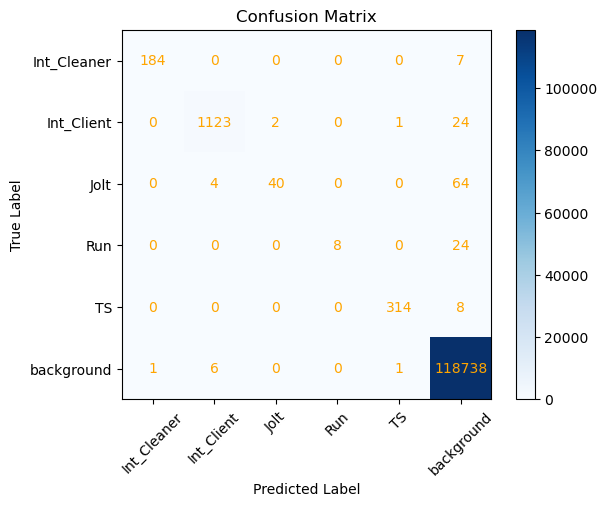

In [88]:
# Define the class labels
class_labels = np.sort(merged_df['Interaction'].unique())

# Create the confusion matrix
cm = np.array(cm)

# Create a figure and axis
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(len(class_labels)))
ax.set_yticks(np.arange(len(class_labels)))
ax.set_xticklabels(class_labels, rotation=45)
ax.set_yticklabels(class_labels)

# Add labels to each cell
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        text = ax.text(j, i, cm[i, j], ha='center', va='center', color='orange')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Show the plot
plt.show()

---
---
---
---

# RandomForest (all Columns) with 5k backgrounds

In [89]:
background_df = merged_df[merged_df['Interaction'] == 'background']
other_df = merged_df[merged_df['Interaction'] != 'background']

In [90]:
desired_background_samples = 5000

In [91]:
background_sample = background_df.sample(n=desired_background_samples, random_state=1999)

In [92]:
undersampled_df = pd.concat([background_sample, other_df], ignore_index=True)

In [93]:
interaction_counts_new = undersampled_df['Interaction'].value_counts()
print(interaction_counts_new)

Int_Client     5524
background     5000
TS             1474
Int_Cleaner     955
Jolt            490
Run             145
Name: Interaction, dtype: int64


In [94]:
X_new5000 = undersampled_df.iloc[:, 1:43]  # Select columns 1 to 42 as features
y_new5000 = undersampled_df.iloc[:, 0]     # Select column 0 as the target variable

In [95]:
X_train_new5000, X_test_new5000, y_train_new5000, y_test_new5000 = train_test_split(X_new5000, y_new5000, test_size=0.2, random_state=1999)

In [96]:
imputer = SimpleImputer(strategy='mean')

X_train_imputed_new5000 = imputer.fit_transform(X_train_new5000)
X_test_imputed_new5000 = imputer.transform(X_test_new5000)

In [97]:
model_new5000 = RandomForestClassifier()
model.fit(X_train_imputed_new5000, y_train_new5000)

RandomForestClassifier()

In [98]:
y_pred_new5000 = model.predict(X_test_imputed_new5000)
accuracy_new5000 = accuracy_score(y_test_new5000, y_pred_new5000)
print("Accuracy:", accuracy_new5000)

Accuracy: 0.9874908020603385


In [99]:
# Assuming you have the predicted labels (y_pred) and actual labels (y_test)
cm_new5000 = confusion_matrix(y_test_new5000, y_pred_new5000)

#print(cm_new5000)

In [100]:
# Count the occurrences of each unique value
unique_values, value_counts = np.unique(y_pred_new5000, return_counts=True)

# Print the unique values and their counts
for value, count in zip(unique_values, value_counts):
    print(f"{value}: {count}")

Int_Cleaner: 168
Int_Client: 1110
Jolt: 103
Run: 21
TS: 304
background: 1012


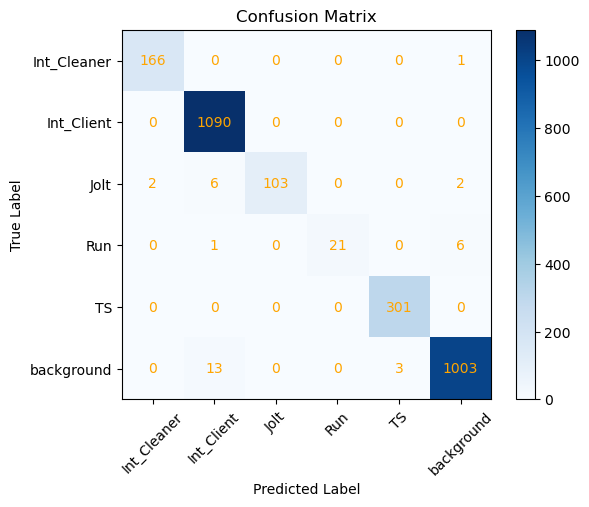

In [101]:
# Define the class labels
class_labels_new5000 = np.sort(merged_df['Interaction'].unique())

# Create the confusion matrix
cm_new5000 = np.array(cm_new5000)

# Create a figure and axis
fig, ax = plt.subplots()
im = ax.imshow(cm_new5000, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(len(class_labels_new5000)))
ax.set_yticks(np.arange(len(class_labels_new5000)))
ax.set_xticklabels(class_labels_new5000, rotation=45)
ax.set_yticklabels(class_labels_new5000)


# Add labels to each cell
for i in range(len(class_labels_new5000)):
    for j in range(len(class_labels_new5000)):
        text = ax.text(j, i, cm_new5000[i, j], ha='center', va='center', color='orange')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Show the plot
plt.show()

---
---
---
---

# Feature Selection

In [102]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [103]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.01,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3)

In [104]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()
# Encode the target variable
y_train_encoded = label_encoder.fit_transform(y_train_new5000)

In [105]:
search.fit(X_train_imputed_new5000,y_train_encoded)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ................model__alpha=0.01;, score=-2.855 total time=   0.0s
[CV 2/5] END ................model__alpha=0.01;, score=-2.771 total time=   0.0s
[CV 3/5] END ................model__alpha=0.01;, score=-2.797 total time=   0.0s
[CV 4/5] END ................model__alpha=0.01;, score=-2.833 total time=   0.0s
[CV 5/5] END ................model__alpha=0.01;, score=-2.830 total time=   0.0s
[CV 1/5] END ................model__alpha=0.11;, score=-3.046 total time=   0.0s
[CV 2/5] END ................model__alpha=0.11;, score=-2.976 total time=   0.0s
[CV 3/5] END ................model__alpha=0.11;, score=-2.948 total time=   0.0s
[CV 4/5] END ................model__alpha=0.11;, score=-3.021 total time=   0.0s
[CV 5/5] END ................model__alpha=0.11;, score=-3.029 total time=   0.0s
[CV 1/5] END .model__alpha=0.21000000000000002;, score=-3.204 total time=   0.0s
[CV 2/5] END .model__alpha=0.21000000000000002

[CV 5/5] END ................model__alpha=2.01;, score=-3.879 total time=   0.0s
[CV 1/5] END ................model__alpha=2.11;, score=-3.881 total time=   0.0s
[CV 2/5] END ................model__alpha=2.11;, score=-3.757 total time=   0.0s
[CV 3/5] END ................model__alpha=2.11;, score=-3.790 total time=   0.0s
[CV 4/5] END ................model__alpha=2.11;, score=-3.894 total time=   0.0s
[CV 5/5] END ................model__alpha=2.11;, score=-3.879 total time=   0.0s
[CV 1/5] END ................model__alpha=2.21;, score=-3.881 total time=   0.0s
[CV 2/5] END ................model__alpha=2.21;, score=-3.757 total time=   0.0s
[CV 3/5] END ................model__alpha=2.21;, score=-3.790 total time=   0.0s
[CV 4/5] END ................model__alpha=2.21;, score=-3.894 total time=   0.0s
[CV 5/5] END ................model__alpha=2.21;, score=-3.879 total time=   0.0s
[CV 1/5] END ................model__alpha=2.31;, score=-3.881 total time=   0.0s
[CV 2/5] END ...............

[CV 1/5] END ................model__alpha=4.21;, score=-3.881 total time=   0.0s
[CV 2/5] END ................model__alpha=4.21;, score=-3.757 total time=   0.0s
[CV 3/5] END ................model__alpha=4.21;, score=-3.790 total time=   0.0s
[CV 4/5] END ................model__alpha=4.21;, score=-3.894 total time=   0.0s
[CV 5/5] END ................model__alpha=4.21;, score=-3.879 total time=   0.0s
[CV 1/5] END ................model__alpha=4.31;, score=-3.881 total time=   0.0s
[CV 2/5] END ................model__alpha=4.31;, score=-3.757 total time=   0.0s
[CV 3/5] END ................model__alpha=4.31;, score=-3.790 total time=   0.0s
[CV 4/5] END ................model__alpha=4.31;, score=-3.894 total time=   0.0s
[CV 5/5] END ................model__alpha=4.31;, score=-3.879 total time=   0.0s
[CV 1/5] END ................model__alpha=4.41;, score=-3.881 total time=   0.0s
[CV 2/5] END ................model__alpha=4.41;, score=-3.757 total time=   0.0s
[CV 3/5] END ...............

[CV 2/5] END ................model__alpha=6.51;, score=-3.757 total time=   0.0s
[CV 3/5] END ................model__alpha=6.51;, score=-3.790 total time=   0.0s
[CV 4/5] END ................model__alpha=6.51;, score=-3.894 total time=   0.0s
[CV 5/5] END ................model__alpha=6.51;, score=-3.879 total time=   0.0s
[CV 1/5] END ................model__alpha=6.61;, score=-3.881 total time=   0.0s
[CV 2/5] END ................model__alpha=6.61;, score=-3.757 total time=   0.0s
[CV 3/5] END ................model__alpha=6.61;, score=-3.790 total time=   0.0s
[CV 4/5] END ................model__alpha=6.61;, score=-3.894 total time=   0.0s
[CV 5/5] END ................model__alpha=6.61;, score=-3.879 total time=   0.0s
[CV 1/5] END ................model__alpha=6.71;, score=-3.881 total time=   0.0s
[CV 2/5] END ................model__alpha=6.71;, score=-3.757 total time=   0.0s
[CV 3/5] END ................model__alpha=6.71;, score=-3.790 total time=   0.0s
[CV 4/5] END ...............

[CV 1/5] END ................model__alpha=8.71;, score=-3.881 total time=   0.0s
[CV 2/5] END ................model__alpha=8.71;, score=-3.757 total time=   0.0s
[CV 3/5] END ................model__alpha=8.71;, score=-3.790 total time=   0.0s
[CV 4/5] END ................model__alpha=8.71;, score=-3.894 total time=   0.0s
[CV 5/5] END ................model__alpha=8.71;, score=-3.879 total time=   0.0s
[CV 1/5] END ................model__alpha=8.81;, score=-3.881 total time=   0.0s
[CV 2/5] END ................model__alpha=8.81;, score=-3.757 total time=   0.0s
[CV 3/5] END ................model__alpha=8.81;, score=-3.790 total time=   0.0s
[CV 4/5] END ................model__alpha=8.81;, score=-3.894 total time=   0.0s
[CV 5/5] END ................model__alpha=8.81;, score=-3.879 total time=   0.0s
[CV 1/5] END ................model__alpha=8.91;, score=-3.881 total time=   0.0s
[CV 2/5] END ................model__alpha=8.91;, score=-3.757 total time=   0.0s
[CV 3/5] END ...............

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91, 1.01,
       1.11, 1.21, 1.31, 1.41, 1.51, 1.61, 1.71, 1.81, 1.91, 2.01, 2.11,
       2.21, 2.31, 2.41, 2.51, 2.61, 2.71, 2.81, 2.91, 3.01, 3.11, 3.21,
       3.31, 3.41, 3.51, 3.61, 3.71, 3.81, 3.91, 4.01, 4.11, 4.21, 4.31,
       4.41, 4.51, 4.61, 4.71, 4.81, 4.91, 5.01, 5.11, 5.21, 5.31, 5.41,
       5.51, 5.61, 5.71, 5.81, 5.91, 6.01, 6.11, 6.21, 6.31, 6.41, 6.51,
       6.61, 6.71, 6.81, 6.91, 7.01, 7.11, 7.21, 7.31, 7.41, 7.51, 7.61,
       7.71, 7.81, 7.91, 8.01, 8.11, 8.21, 8.31, 8.41, 8.51, 8.61, 8.71,
       8.81, 8.91, 9.01, 9.11, 9.21, 9.31, 9.41, 9.51, 9.61, 9.71, 9.81,
       9.91])},
             scoring='neg_mean_squared_error', verbose=3)

In [106]:
search.best_params_

{'model__alpha': 0.01}

In [107]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [108]:
# Create Lasso model for feature selection
lasso = Lasso(alpha=0.01, max_iter=10000)  # Adjust the alpha parameter as needed

# Perform feature selection
sfm = SelectFromModel(lasso)
X_train_selected = sfm.fit_transform(X_train_imputed_new5000, y_train_encoded)

# Get the selected feature indices
selected_feature_indices = sfm.get_support(indices=True)

# Get the selected feature names
selected_feature_names = X_train.columns[selected_feature_indices]

# Print the selected feature names
print("Selected Features:")
for feature_name in selected_feature_names:
    print(feature_name)

Selected Features:
Client_Mouth
Client_Mouth.1
Client_Spine_head
Client_Spine_head.1
Client_Spine_tail
Client_Spine_tail.1
Client_Body_top1
Client_Body_top1.1
Client_Body_top2
Client_Body_top2.1
Client_Body_bot1
Client_Body_bot1.1
Client_Body_bot2
Client_Body_bot2.1
Client_Tail
Client_Tail.1
Client_Tail_Top
Client_Tail_Top.1
Client_Tail_Bot
Client_Tail_Bot.1
Cleaner_Mouth
Cleaner_Mouth.1
Cleaner_Mouth.2
Cleaner_Spine1
Cleaner_Spine1.1
Cleaner_Spine1.2
Cleaner_Spine2
Cleaner_Spine2.1
Cleaner_Tail
Cleaner_Tail.1


---
---
---

# RandomForest (Columns likelihood out) with 5k backgrounds
+ Imputer = mean

In [109]:
columns = [1,2,4,5,7,8,10,11,13,14,16,17,19,20,22,23,25,26,28,29,31,32,34,35,37,38,40,41]

In [110]:
X_new5000_featuresselection = undersampled_df.iloc[:, columns]  # Select columns 1 to 42 as features
y_new5000_featuresselection = undersampled_df.iloc[:, 0]     # Select column 0 as the target variable

In [111]:
X_train_new5000_featuresselection, X_test_new5000_featuresselection, y_train_new5000_featuresselection, y_test_new5000_featuresselection = train_test_split(X_new5000_featuresselection, y_new5000_featuresselection, test_size=0.2, random_state=1999)

In [112]:
imputer = SimpleImputer(strategy='mean')

X_train_imputed_new5000_featuresselection = imputer.fit_transform(X_train_new5000_featuresselection)
X_test_imputed_new5000_featuresselection = imputer.transform(X_test_new5000_featuresselection)

In [113]:
model_new5000_featuresselection = RandomForestClassifier()
model_new5000_featuresselection.fit(X_train_imputed_new5000_featuresselection, y_train_new5000_featuresselection)

RandomForestClassifier()

In [114]:
y_pred_new5000_featuresselection = model_new5000_featuresselection.predict(X_test_imputed_new5000_featuresselection)
accuracy_new5000_featuresselection = accuracy_score(y_test_new5000_featuresselection, y_pred_new5000_featuresselection)
print("Accuracy:", accuracy_new5000_featuresselection)

Accuracy: 0.9889624724061811


In [115]:
# Assuming you have the predicted labels (y_pred) and actual labels (y_test)
cm_new5000_featuresselection = confusion_matrix(y_test_new5000_featuresselection, y_pred_new5000_featuresselection)

#print(cm_new5000_featuresselection)

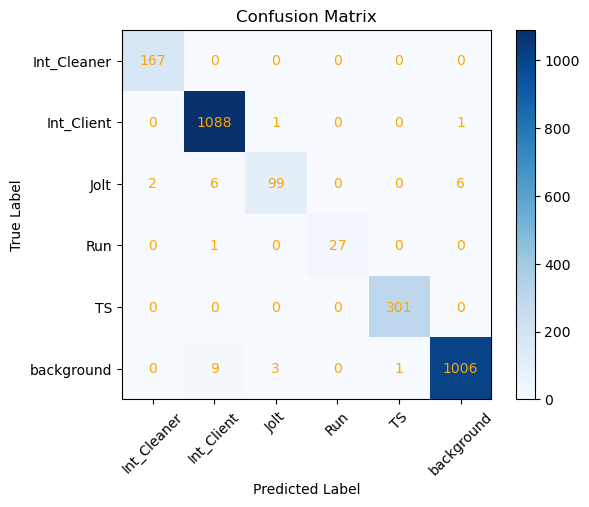

In [116]:
# Define the class labels
class_labels_new5000_featuresselection = np.sort(merged_df['Interaction'].unique())

# Create the confusion matrix
cm_new5000_featuresselection = np.array(cm_new5000_featuresselection)

# Create a figure and axis
fig, ax = plt.subplots()
im = ax.imshow(cm_new5000_featuresselection, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(len(class_labels_new5000_featuresselection)))
ax.set_yticks(np.arange(len(class_labels_new5000_featuresselection)))
ax.set_xticklabels(class_labels_new5000_featuresselection, rotation=45)
ax.set_yticklabels(class_labels_new5000_featuresselection)


# Add labels to each cell
for i in range(len(class_labels_new5000_featuresselection)):
    for j in range(len(class_labels_new5000_featuresselection)):
        text = ax.text(j, i, cm_new5000_featuresselection[i, j], ha='center', va='center', color='orange')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Show the plot
plt.show()

# RandomForest (Columns likelihood out) with 5k backgrounds
+ Imputer = KNNImputer

In [117]:
columns = [1,2,4,5,7,8,10,11,13,14,16,17,19,20,22,23,25,26,28,29,31,32,34,35,37,38,40,41]

In [118]:
X_new5000_featuresselection_knn = undersampled_df.iloc[:, columns]  # Select columns 1 to 42 as features
y_new5000_featuresselection_knn = undersampled_df.iloc[:, 0]     # Select column 0 as the target variable

In [119]:
X_train_new5000_featuresselection_knn, X_test_new5000_featuresselection_knn, y_train_new5000_featuresselection_knn, y_test_new5000_featuresselection_knn = train_test_split(X_new5000_featuresselection_knn, y_new5000_featuresselection_knn, test_size=0.2, random_state=1999)

In [120]:
imputer_knn = KNNImputer(n_neighbors=5, weights='uniform')
X_train_imputed_new5000_featuresselection_knn = imputer_knn.fit_transform(X_train_new5000_featuresselection_knn)
X_test_imputed_new5000_featuresselection_knn = imputer_knn.transform(X_test_new5000_featuresselection_knn)

In [121]:
model_new5000_featuresselection_knn = RandomForestClassifier()
model_new5000_featuresselection_knn.fit(X_train_imputed_new5000_featuresselection_knn, y_train_new5000_featuresselection_knn)

RandomForestClassifier()

In [122]:
y_pred_new5000_featuresselection_knn = model_new5000_featuresselection_knn.predict(X_test_imputed_new5000_featuresselection_knn)
accuracy_new5000_featuresselection = accuracy_score(y_test_new5000_featuresselection_knn, y_pred_new5000_featuresselection_knn)
print("Accuracy:", accuracy_new5000_featuresselection)

Accuracy: 0.9893303899926417


In [123]:
# Assuming you have the predicted labels (y_pred) and actual labels (y_test)
cm_new5000_featuresselection_knn = confusion_matrix(y_test_new5000_featuresselection_knn, y_pred_new5000_featuresselection_knn)

#print(cm_new5000_featuresselection)

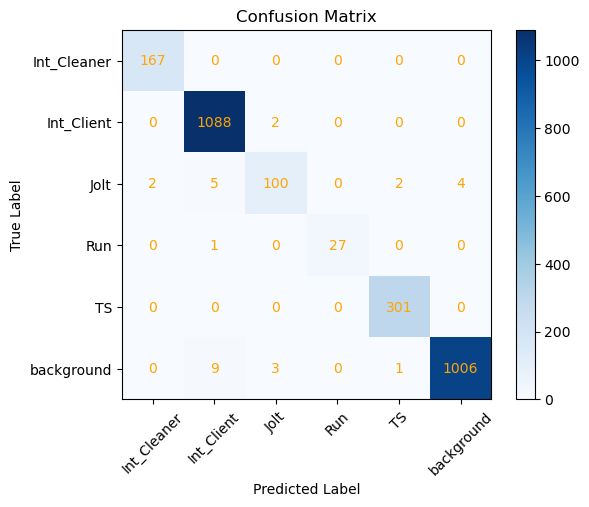

In [124]:
# Define the class labels
class_labels_new5000_featuresselection = np.sort(merged_df['Interaction'].unique())

# Create the confusion matrix
cm_new5000_featuresselection_knn = np.array(cm_new5000_featuresselection_knn)

# Create a figure and axis
fig, ax = plt.subplots()
im = ax.imshow(cm_new5000_featuresselection_knn, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(len(class_labels_new5000_featuresselection)))
ax.set_yticks(np.arange(len(class_labels_new5000_featuresselection)))
ax.set_xticklabels(class_labels_new5000_featuresselection, rotation=45)
ax.set_yticklabels(class_labels_new5000_featuresselection)


# Add labels to each cell
for i in range(len(class_labels_new5000_featuresselection)):
    for j in range(len(class_labels_new5000_featuresselection)):
        text = ax.text(j, i, cm_new5000_featuresselection_knn[i, j], ha='center', va='center', color='orange')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Show the plot
plt.show()